# Aplikasi ROI (Region of Interest) Detection menggunakan YOLO

Notebook ini mengimplementasikan deteksi objek menggunakan YOLO (You Only Look Once) dan analisis ROI untuk mendeteksi dan menganalisis area tertentu dalam gambar atau video.

## 1. Install Library yang Diperlukan

In [11]:
# Install ultralytics untuk YOLOv8
!pip install ultralytics opencv-python pillow matplotlib numpy

  Using cached ultralytics-8.3.225-py3-none-any.whl.metadata (37 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.4-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached torch-2.9.0-cp314-cp314-win_amd64.whl.metadata (30 kB)
  Using cached torchvision-0.24.0-cp314-cp314-win_amd64.whl.metadata (5.9 kB)
  Using cached psutil-7.1.3-cp37-abi3-win_amd64.whl.metadata (23 kB)
  Using cached polars-1.35.1-py3-none-any.whl.metadata (10 kB)
  Using cached ultralytics_thop-2.0.18-py3-none-any.whl.metadata (14 kB)
  Using cached numpy-2.2.6.tar.gz (20.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requi

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + C:\Users\Lenovo\AppData\Local\Programs\Python\Python314\python.exe C:\Users\Lenovo\AppData\Local\Temp\pip-install-xko20jx4\numpy_b5bb6db1f9484353a368b1a9e840bea4\vendored-meson\meson\meson.py setup C:\Users\Lenovo\AppData\Local\Temp\pip-install-xko20jx4\numpy_b5bb6db1f9484353a368b1a9e840bea4 C:\Users\Lenovo\AppData\Local\Temp\pip-install-xko20jx4\numpy_b5bb6db1f9484353a368b1a9e840bea4\.mesonpy-otooj0r7 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Lenovo\AppData\Local\Temp\pip-install-xko20jx4\numpy_b5bb6db1f9484353a368b1a9e840bea4\.mesonpy-otooj0r7\meson-python-native-file.ini
      The Meson build system
      Version: 1.5.2
      Source dir: C:\Users\Lenovo\AppData\Local\Temp\pip-install-xko20jx4\numpy_b5bb6db1f9484353a368b1a9e840bea4
      Build dir: C:\Users\Lenovo\AppData\Local\Temp\pip-insta

## 2. Import Library

In [12]:
%pip install opencv-python numpy ultralytics matplotlib pillow

import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import os

print("✅ Semua library berhasil diimport!")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")

Note: you may need to restart the kernel to use updated packages.
✅ Semua library berhasil diimport!
OpenCV version: 4.12.0
NumPy version: 2.2.6



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3. Load Model YOLO

In [13]:
# Load YOLOv8 model (akan otomatis download jika belum ada)
# Pilihan model: yolov8n.pt (nano), yolov8s.pt (small), yolov8m.pt (medium), yolov8l.pt (large), yolov8x.pt (xlarge)
model = YOLO('yolov8n.pt')  # Menggunakan model nano untuk kecepatan

print("Model YOLO berhasil dimuat!")
print(f"Kelas yang dapat dideteksi: {model.names}")

Model YOLO berhasil dimuat!
Kelas yang dapat dideteksi: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65:

## 4. Fungsi Helper untuk ROI Detection

In [14]:
def define_roi(image_shape, roi_type='center', custom_roi=None):
    """
    Mendefinisikan Region of Interest (ROI)
    
    Parameters:
    - image_shape: tuple (height, width)
    - roi_type: 'center', 'top', 'bottom', 'left', 'right', 'custom'
    - custom_roi: tuple (x1, y1, x2, y2) untuk ROI custom
    
    Returns:
    - ROI coordinates (x1, y1, x2, y2)
    """
    h, w = image_shape[:2]
    
    if roi_type == 'center':
        # ROI di tengah (50% dari ukuran gambar)
        x1, y1 = int(w * 0.25), int(h * 0.25)
        x2, y2 = int(w * 0.75), int(h * 0.75)
    elif roi_type == 'top':
        x1, y1 = 0, 0
        x2, y2 = w, int(h * 0.5)
    elif roi_type == 'bottom':
        x1, y1 = 0, int(h * 0.5)
        x2, y2 = w, h
    elif roi_type == 'left':
        x1, y1 = 0, 0
        x2, y2 = int(w * 0.5), h
    elif roi_type == 'right':
        x1, y1 = int(w * 0.5), 0
        x2, y2 = w, h
    elif roi_type == 'custom' and custom_roi:
        x1, y1, x2, y2 = custom_roi
    else:
        # Default: full image
        x1, y1, x2, y2 = 0, 0, w, h
    
    return (x1, y1, x2, y2)


def is_in_roi(box, roi):
    """
    Mengecek apakah bounding box berada di dalam ROI
    
    Parameters:
    - box: tuple (x1, y1, x2, y2) - bounding box objek
    - roi: tuple (x1, y1, x2, y2) - ROI coordinates
    
    Returns:
    - Boolean: True jika box di dalam ROI
    """
    box_x1, box_y1, box_x2, box_y2 = box
    roi_x1, roi_y1, roi_x2, roi_y2 = roi
    
    # Cek apakah center point dari box berada di dalam ROI
    center_x = (box_x1 + box_x2) / 2
    center_y = (box_y1 + box_y2) / 2
    
    return (roi_x1 <= center_x <= roi_x2 and roi_y1 <= center_y <= roi_y2)


def calculate_iou(box1, box2):
    """
    Menghitung Intersection over Union (IoU) antara dua bounding box
    """
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    
    # Intersection area
    x1_i = max(x1_1, x1_2)
    y1_i = max(y1_1, y1_2)
    x2_i = min(x2_1, x2_2)
    y2_i = min(y2_1, y2_2)
    
    if x2_i < x1_i or y2_i < y1_i:
        return 0.0
    
    intersection = (x2_i - x1_i) * (y2_i - y1_i)
    
    # Union area
    area1 = (x2_1 - x1_1) * (y2_1 - y1_1)
    area2 = (x2_2 - x1_2) * (y2_2 - y1_2)
    union = area1 + area2 - intersection
    
    return intersection / union if union > 0 else 0.0


print("Fungsi helper berhasil didefinisikan!")

Fungsi helper berhasil didefinisikan!


## 5. Deteksi Objek pada Gambar dengan ROI

In [15]:
def detect_objects_with_roi(image_path, roi_type='center', custom_roi=None, conf_threshold=0.5):
    """
    Deteksi objek dalam gambar dengan fokus pada ROI tertentu
    
    Parameters:
    - image_path: path ke gambar
    - roi_type: tipe ROI ('center', 'top', 'bottom', 'left', 'right', 'custom')
    - custom_roi: koordinat custom ROI (x1, y1, x2, y2)
    - conf_threshold: threshold confidence untuk deteksi
    """
    # Load gambar
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]
    
    # Definisikan ROI
    roi = define_roi(image.shape, roi_type, custom_roi)
    roi_x1, roi_y1, roi_x2, roi_y2 = roi
    
    # Deteksi objek
    results = model(image, conf=conf_threshold)
    
    # Gambar hasil
    image_result = image.copy()
    
    # Gambar ROI (kotak biru)
    cv2.rectangle(image_result, (roi_x1, roi_y1), (roi_x2, roi_y2), (0, 0, 255), 3)
    cv2.putText(image_result, 'ROI', (roi_x1 + 10, roi_y1 + 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Counter untuk objek dalam ROI
    objects_in_roi = []
    objects_outside_roi = []
    
    # Proses setiap deteksi
    for result in results:
        boxes = result.boxes
        for box in boxes:
            # Dapatkan koordinat
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            
            # Dapatkan confidence dan class
            conf = float(box.conf[0])
            cls = int(box.cls[0])
            label = model.names[cls]
            
            # Cek apakah objek dalam ROI
            in_roi = is_in_roi((x1, y1, x2, y2), roi)
            
            # Tentukan warna berdasarkan posisi
            if in_roi:
                color = (0, 255, 0)  # Hijau untuk objek dalam ROI
                objects_in_roi.append({'label': label, 'conf': conf, 'box': (x1, y1, x2, y2)})
            else:
                color = (255, 165, 0)  # Orange untuk objek di luar ROI
                objects_outside_roi.append({'label': label, 'conf': conf, 'box': (x1, y1, x2, y2)})
            
            # Gambar bounding box
            cv2.rectangle(image_result, (x1, y1), (x2, y2), color, 2)
            
            # Gambar label
            text = f'{label} {conf:.2f}'
            cv2.putText(image_result, text, (x1, y1 - 10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Tampilkan hasil
    plt.figure(figsize=(15, 10))
    plt.imshow(image_result)
    plt.axis('off')
    plt.title(f'YOLO Detection with ROI - Objects in ROI: {len(objects_in_roi)}, Outside ROI: {len(objects_outside_roi)}')
    plt.tight_layout()
    plt.show()
    
    # Print statistik
    print(f"\n{'='*60}")
    print(f"STATISTIK DETEKSI")
    print(f"{'='*60}")
    print(f"Total objek terdeteksi: {len(objects_in_roi) + len(objects_outside_roi)}")
    print(f"Objek dalam ROI: {len(objects_in_roi)}")
    print(f"Objek di luar ROI: {len(objects_outside_roi)}")
    
    if objects_in_roi:
        print(f"\n{'='*60}")
        print("OBJEK DALAM ROI:")
        print(f"{'='*60}")
        for i, obj in enumerate(objects_in_roi, 1):
            print(f"{i}. {obj['label']} - Confidence: {obj['conf']:.2%}")
    
    return image_result, objects_in_roi, objects_outside_roi


print("Fungsi deteksi dengan ROI berhasil didefinisikan!")

Fungsi deteksi dengan ROI berhasil didefinisikan!


## 6. Deteksi Real-time dari Webcam dengan ROI

**Instruksi:** 
- Jalankan cell di bawah untuk memulai deteksi real-time
- Tekan **'q'** pada jendela video untuk menghentikan
- ROI akan ditampilkan sebagai kotak merah
- Objek dalam ROI = kotak hijau
- Objek di luar ROI = kotak orange

In [16]:
def detect_webcam_realtime(roi_type='center', custom_roi=None, conf_threshold=0.5, save_video=False, output_path='webcam_output.mp4'):
    """
    Deteksi objek real-time dari webcam dengan ROI
    
    Parameters:
    - roi_type: 'center', 'top', 'bottom', 'left', 'right', 'custom'
    - custom_roi: tuple (x1, y1, x2, y2) untuk ROI custom
    - conf_threshold: threshold confidence untuk deteksi
    - save_video: True untuk menyimpan rekaman
    - output_path: path untuk menyimpan video output
    
    Controls:
    - Tekan 'q' untuk keluar
    - Tekan 's' untuk screenshot
    - Tekan 'r' untuk reset statistik
    """
    # Buka webcam
    cap = cv2.VideoCapture(0)
    
    # Set resolusi ke HD untuk tampilan lebih besar dan jelas
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
    
    # Tunggu webcam siap
    ret, frame = cap.read()
    if not ret:
        print("❌ Tidak dapat mengakses webcam!")
        print("Pastikan:")
        print("1. Webcam terhubung dengan benar")
        print("2. Tidak ada aplikasi lain yang menggunakan webcam")
        print("3. Driver webcam terinstall dengan benar")
        return
    
    h, w = frame.shape[:2]
    print(f"✅ Webcam berhasil diakses!")
    print(f"📐 Resolusi: {w}x{h}")
    
    # Buat window dengan nama
    window_name = 'YOLO Real-time Detection with ROI'
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)  # WINDOW_NORMAL agar bisa di-resize
    
    # Set window ke fullscreen atau maximize
    # Pilihan 1: Fullscreen mode (uncomment baris di bawah jika ingin fullscreen penuh)
    cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    
    # Pilihan 2: Maximized window (comment baris fullscreen di atas, uncomment baris di bawah)
    # cv2.setWindowProperty(window_name, cv2.WND_PROP_AUTOSIZE, cv2.WINDOW_NORMAL)
    # cv2.resizeWindow(window_name, 1920, 1080)  # Sesuaikan dengan resolusi layar Anda
    
    # Definisikan ROI
    roi = define_roi((h, w), roi_type, custom_roi)
    roi_x1, roi_y1, roi_x2, roi_y2 = roi
    print(f"🎯 ROI: ({roi_x1}, {roi_y1}) -> ({roi_x2}, {roi_y2})")
    
    # Setup video writer jika save_video = True
    out = None
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        fps = int(cap.get(cv2.CAP_PROP_FPS)) or 30
        out = cv2.VideoWriter(output_path, fourcc, fps, (w, h))
        print(f"💾 Video akan disimpan ke: {output_path}")
    
    print("\n🚀 Deteksi real-time dimulai!")
    print("⌨️  Controls:")
    print("   - Tekan 'q' untuk keluar")
    print("   - Tekan 's' untuk screenshot")
    print("   - Tekan 'r' untuk reset statistik")
    print("   - Tekan 'f' untuk toggle fullscreen/normal")
    print("   - Tekan 'ESC' untuk keluar dari fullscreen")
    print("-" * 50)
    
    # Statistik
    frame_count = 0
    total_detections = 0
    objects_count_history = []
    screenshot_count = 0
    
    # FPS calculation
    import time
    fps_start_time = time.time()
    fps_counter = 0
    current_fps = 0
    
    while True:
        ret, frame = cap.read()
        if not ret:
            print("⚠️ Gagal membaca frame dari webcam")
            break
        
        frame_count += 1
        fps_counter += 1
        
        # Hitung FPS setiap 30 frame
        if fps_counter >= 30:
            current_fps = fps_counter / (time.time() - fps_start_time)
            fps_start_time = time.time()
            fps_counter = 0
        
        # Deteksi objek
        results = model(frame, conf=conf_threshold, verbose=False)
        
        # Gambar ROI
        cv2.rectangle(frame, (roi_x1, roi_y1), (roi_x2, roi_y2), (0, 0, 255), 3)
        cv2.putText(frame, 'ROI', (roi_x1 + 10, roi_y1 + 35),
                   cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)
        
        # Counter
        count_in_roi = 0
        count_outside_roi = 0
        detected_objects = {}
        
        # Proses deteksi
        for result in results:
            boxes = result.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                
                conf = float(box.conf[0])
                cls = int(box.cls[0])
                label = model.names[cls]
                
                # Cek ROI
                in_roi = is_in_roi((x1, y1, x2, y2), roi)
                
                if in_roi:
                    color = (0, 255, 0)  # Hijau
                    count_in_roi += 1
                    # Count objects by type
                    detected_objects[label] = detected_objects.get(label, 0) + 1
                else:
                    color = (0, 165, 255)  # Orange (BGR format)
                    count_outside_roi += 1
                
                # Gambar bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                
                # Label dengan background
                text = f'{label} {conf:.2f}'
                (text_w, text_h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
                cv2.rectangle(frame, (x1, y1 - text_h - 10), (x1 + text_w, y1), color, -1)
                cv2.putText(frame, text, (x1, y1 - 5),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        
        objects_count_history.append(count_in_roi)
        total_detections += count_in_roi
        
        # === PANEL INFORMASI ===
        # Background untuk info panel (semi-transparent)
        overlay = frame.copy()
        cv2.rectangle(overlay, (10, 10), (400, 200), (0, 0, 0), -1)
        cv2.addWeighted(overlay, 0.6, frame, 0.4, 0, frame)
        
        # Informasi statistik
        info_y = 35
        cv2.putText(frame, f'FPS: {current_fps:.1f}', (20, info_y),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        
        info_y += 30
        cv2.putText(frame, f'Frame: {frame_count}', (20, info_y),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        
        info_y += 30
        cv2.putText(frame, f'Objects in ROI: {count_in_roi}', (20, info_y),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
        info_y += 30
        cv2.putText(frame, f'Objects outside: {count_outside_roi}', (20, info_y),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 165, 255), 2)
        
        # Tampilkan objek yang terdeteksi dalam ROI
        if detected_objects:
            info_y += 30
            cv2.putText(frame, 'Detected in ROI:', (20, info_y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
            for obj_label, obj_count in detected_objects.items():
                info_y += 25
                cv2.putText(frame, f'  {obj_label}: {obj_count}', (20, info_y),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        
        # Controls info (bottom)
        cv2.putText(frame, "Press 'q'=Quit | 's'=Screenshot | 'r'=Reset | 'f'=Toggle Fullscreen", (10, h - 20),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        
        # Simpan video jika diaktifkan
        if save_video and out is not None:
            out.write(frame)
        
        # Tampilkan frame di window
        cv2.imshow(window_name, frame)
        
        # Keyboard controls
        key = cv2.waitKey(1) & 0xFF
        
        if key == ord('q'):
            print("\n⏹️  Deteksi dihentikan oleh user")
            break
        elif key == ord('f'):
            # Toggle fullscreen
            is_fullscreen = cv2.getWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN)
            if is_fullscreen == cv2.WINDOW_FULLSCREEN:
                cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_NORMAL)
                print("📐 Mode: Normal window")
            else:
                cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
                print("🖥️ Mode: Fullscreen")
        elif key == ord('s'):
            screenshot_count += 1
            screenshot_name = f'screenshot_{screenshot_count}.jpg'
            cv2.imwrite(screenshot_name, frame)
            print(f"📸 Screenshot disimpan: {screenshot_name}")
        elif key == ord('r'):
            frame_count = 0
            total_detections = 0
            objects_count_history = []
            print("🔄 Statistik direset")
        elif key == 27:  # ESC key
            print("\n⏹️  Deteksi dihentikan (ESC pressed)")
            break
    
    # Release resources
    cap.release()
    if save_video and out is not None:
        out.release()
    cv2.destroyAllWindows()
    
    # Tampilkan statistik akhir
    print("\n" + "="*60)
    print("📊 STATISTIK AKHIR")
    print("="*60)
    print(f"Total frame diproses: {frame_count}")
    print(f"Total deteksi dalam ROI: {total_detections}")
    if frame_count > 0:
        print(f"Rata-rata objek per frame: {total_detections/frame_count:.2f}")
        print(f"Rata-rata objek dalam ROI: {np.mean(objects_count_history):.2f}")
    if save_video:
        print(f"Video disimpan di: {output_path}")
    print("="*60)
    
    return objects_count_history


print("✅ Fungsi deteksi webcam real-time berhasil didefinisikan!")

✅ Fungsi deteksi webcam real-time berhasil didefinisikan!


✅ Webcam berhasil diakses!
📐 Resolusi: 1280x720
🎯 ROI: (320, 180) -> (960, 540)

🚀 Deteksi real-time dimulai!
⌨️  Controls:
   - Tekan 'q' untuk keluar
   - Tekan 's' untuk screenshot
   - Tekan 'r' untuk reset statistik
   - Tekan 'f' untuk toggle fullscreen/normal
   - Tekan 'ESC' untuk keluar dari fullscreen
--------------------------------------------------
📸 Screenshot disimpan: screenshot_1.jpg

⏹️  Deteksi dihentikan oleh user

📊 STATISTIK AKHIR
Total frame diproses: 2179
Total deteksi dalam ROI: 1894
Rata-rata objek per frame: 0.87
Rata-rata objek dalam ROI: 0.87


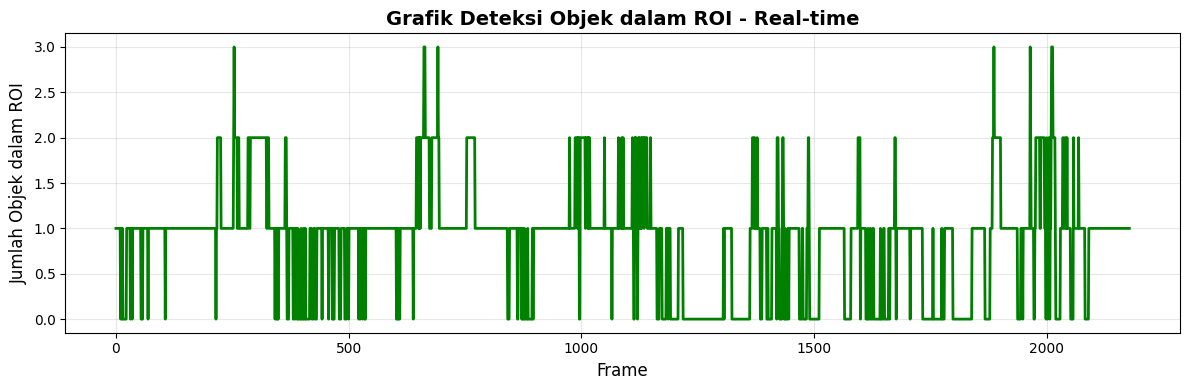

In [17]:
# JALANKAN DETEKSI REAL-TIME DARI WEBCAM
# Mode 1: ROI di tengah
history = detect_webcam_realtime(
    roi_type='center',      # Pilihan: 'center', 'top', 'bottom', 'left', 'right', 'custom'
    conf_threshold=0.5,     # Tingkatkan untuk deteksi lebih akurat (0.6-0.8)
    save_video=False        # Ubah ke True jika ingin merekam video
)

# Visualisasi statistik setelah selesai
if history and len(history) > 0:
    plt.figure(figsize=(12, 4))
    plt.plot(history, linewidth=2, color='green')
    plt.xlabel('Frame', fontsize=12)
    plt.ylabel('Jumlah Objek dalam ROI', fontsize=12)
    plt.title('Grafik Deteksi Objek dalam ROI - Real-time', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [18]:
# Mode 4: Dengan merekam video output
# Uncomment untuk merekam hasil deteksi ke file video
# history = detect_webcam_realtime(
#     roi_type='center',
#     conf_threshold=0.5,
#     save_video=True,
#     output_path='hasil_deteksi_realtime.mp4'
# )
# print("✅ Video hasil deteksi telah disimpan!")

In [19]:
# Mode 3: ROI di berbagai posisi (pilih salah satu)
# Uncomment salah satu untuk mencoba ROI berbeda

# ROI di bagian atas
# history = detect_webcam_realtime(roi_type='top', conf_threshold=0.5)

# ROI di bagian bawah
# history = detect_webcam_realtime(roi_type='bottom', conf_threshold=0.5)

# ROI di sisi kiri
# history = detect_webcam_realtime(roi_type='left', conf_threshold=0.5)

# ROI di sisi kanan
# history = detect_webcam_realtime(roi_type='right', conf_threshold=0.5)

In [20]:
# Mode 2: ROI Custom (Anda bisa sesuaikan koordinat)
# Uncomment untuk menjalankan
# custom_roi_coords = (200, 150, 600, 450)  # (x1, y1, x2, y2)
# history = detect_webcam_realtime(
#     roi_type='custom',
#     custom_roi=custom_roi_coords,
#     conf_threshold=0.5,
#     save_video=False
# )

## 7. Opsi ROI Lainnya untuk Real-time Detection

In [ ]:
## 8. (Opsional) Deteksi pada Video File dengan ROI

Jika Anda ingin memproses file video yang sudah ada (bukan real-time dari webcam)

SyntaxError: invalid syntax (1737242320.py, line 3)

: 

In [ ]:
# (OPSIONAL) Deteksi pada file video
# Uncomment jika Anda ingin memproses file video yang sudah ada

# video_input = 'path/to/your/video.mp4'  # Ganti dengan path video Anda
# video_output = 'output_roi_detection.mp4'

# if os.path.exists(video_input):
#     history = detect_video_with_roi(
#         video_input,
#         video_output,
#         roi_type='center',
#         conf_threshold=0.5
#     )
    
#     # Plot grafik
#     plt.figure(figsize=(12, 4))
#     plt.plot(history)
#     plt.xlabel('Frame')
#     plt.ylabel('Jumlah Objek dalam ROI')
#     plt.title('Jumlah Objek Terdeteksi dalam ROI per Frame')
#     plt.grid(True)
#     plt.show()
# else:
#     print(f"Video tidak ditemukan: {video_input}")

print("Fungsi deteksi video file tersedia (uncomment untuk menggunakan)")

## 9. (Opsional) Deteksi pada Gambar Statis dengan ROI

Jika Anda ingin mendeteksi objek pada gambar (bukan video)

In [ ]:
# (OPSIONAL) Deteksi pada gambar statis
# Uncomment jika Anda ingin mendeteksi objek pada gambar

# image_path = 'path/to/your/image.jpg'  # Ganti dengan path gambar Anda

# if os.path.exists(image_path):
#     result, in_roi, out_roi = detect_objects_with_roi(
#         image_path, 
#         roi_type='center',
#         conf_threshold=0.5
#     )
# else:
#     print(f"Gambar tidak ditemukan: {image_path}")

print("Fungsi deteksi gambar tersedia (uncomment untuk menggunakan)")

In [ ]:
## 10. Tips dan Troubleshooting

### 🎯 Tips untuk Hasil Terbaik:
1. **Pencahayaan**: Pastikan ruangan memiliki pencahayaan yang cukup
2. **Confidence Threshold**: 
   - 0.3-0.4 = Deteksi lebih banyak objek (tapi mungkin ada false positive)
   - 0.5-0.6 = Balance antara akurasi dan jumlah deteksi (recommended)
   - 0.7-0.9 = Hanya deteksi objek dengan confidence tinggi
3. **Model Size**:
   - yolov8n.pt = Paling cepat, cocok untuk real-time (recommended)
   - yolov8s.pt = Balance antara kecepatan dan akurasi
   - yolov8m.pt, yolov8l.pt = Lebih akurat tapi lebih lambat
4. **ROI Position**: Sesuaikan posisi ROI dengan area yang ingin dimonitor

### 🔧 Troubleshooting:
- **Webcam tidak terdeteksi**: Pastikan tidak ada aplikasi lain yang menggunakan webcam
- **FPS rendah**: Gunakan model yolov8n.pt atau turunkan resolusi
- **Video tidak tersimpan**: Pastikan path output valid dan ada write permission
- **Error saat import**: Jalankan kembali cell instalasi library

## Kesimpulan

Notebook ini menyediakan:
1. ✅ **Deteksi objek real-time dari webcam menggunakan YOLOv8**
2. ✅ **ROI (Region of Interest) detection dengan berbagai posisi**
3. ✅ **Statistik dan monitoring objek dalam ROI**
4. ✅ **Kontrol interaktif** (screenshot, reset, save video)
5. ✅ **Visualisasi real-time dengan FPS counter**
6. ✅ **Opsi untuk merekam hasil deteksi**

### 📝 Cara Menggunakan:
1. ✅ Jalankan cell instalasi library (cell 3)
2. ✅ Jalankan cell import library (cell 5)
3. ✅ Load model YOLO (cell 7)
4. ✅ Definisikan fungsi helper (cell 9, 11, 13)
5. ✅ **Jalankan deteksi real-time (cell 15)** 👈 Mulai dari sini!

### ⌨️ Keyboard Controls saat Deteksi:
- **'q'** = Keluar dari deteksi
- **'s'** = Ambil screenshot
- **'r'** = Reset statistik

### 🎨 Color Coding:
- **Kotak Merah** = ROI (Region of Interest)
- **Kotak Hijau** = Objek terdeteksi dalam ROI
- **Kotak Orange** = Objek terdeteksi di luar ROI

### 🚀 Selamat Mencoba!
Jalankan cell 15 untuk memulai deteksi real-time dari kamera laptop Anda!